<!-- ===================== TITLE ===================== -->
<h1 align="center" style="
  color:#ffffff;
  background:linear-gradient(90deg, #072b00, #084b02);
  padding:24px;
  border-radius:14px;
  font-weight:700;
  letter-spacing:0.5px;
">
  🏏 HBL PSL 2026 Cricket Players Auction Analysis
</h1>

<!-- ===================== OVERVIEW ===================== -->
<div style="
  background:#f8fafc;
  padding:18px;
  border-left:6px solid #003a00;
  border-radius:10px;
  margin:24px 0;
  color:#0f172a;
">
  <h3 style="margin-top:0; color:#1e40af;">📋 Project Overview</h3>
  <p style="font-size:15px; line-height:1.6;">
    This notebook presents a comprehensive <strong>Exploratory Data Analysis (EDA)</strong> of the
    <strong>HBL Pakistan Super League 2026</strong> players auction dataset.  
    The analysis explores <strong>player prices, valuation patterns, and auction dynamics</strong>
    using clear visualizations and data-driven insights.
  </p>
</div>

<!-- ===================== INFO CARDS ===================== -->
<div style="
  display:grid;
  grid-template-columns: repeat(auto-fit, minmax(240px, 1fr));
  gap:16px;
  margin:24px 0;
">

  <!-- Author -->
  <div style="
    background:#ffffff;
    padding:18px;
    border-radius:12px;
    box-shadow:0 4px 12px rgba(0,0,0,0.05);
    color:#0f172a;
  ">
    <h4 style="margin-top:0; color:#1e40af;">👨‍💻 Author</h4>
    <p style="margin:0;">
      <strong>Hammad Zahid</strong><br>
      Data Analyst | Sports Analytics Enthusiast
    </p>
  </div>

  <!-- Dataset Info -->
  <div style="
    background:#ffffff;
    padding:18px;
    border-radius:12px;
    box-shadow:0 4px 12px rgba(0,0,0,0.05);
    color:#0f172a;
  ">
    <h4 style="margin-top:0; color:#1e40af;">📊 Dataset Information</h4>
    <p style="margin:0; font-size:14px;">
      <strong>Rows:</strong> 27<br>
      <strong>Columns:</strong> 4<br>
      <strong>Format:</strong> CSV<br>
      <strong>Size:</strong> &lt; 1 MB
    </p>
  </div>

  <!-- Objectives -->
  <div style="
    background:#ffffff;
    padding:18px;
    border-radius:12px;
    box-shadow:0 4px 12px rgba(0,0,0,0.05);
    color:#0f172a;
  ">
    <h4 style="margin-top:0; color:#1e40af;">🎯 Objectives</h4>
    <ul style="padding-left:18px; margin:0; font-size:14px;">
      <li>Player price distribution analysis</li>
      <li>Valuation insights by category</li>
      <li>Auction market trends</li>
      <li>Clear & meaningful visualizations</li>
    </ul>
  </div>

</div>

<!-- ===================== FOOTER NOTE ===================== -->
<div style="
  background:#e0f2fe;
  padding:14px;
  border-radius:10px;
  color:#0f172a;
  font-size:14px;
">
  📌 <strong>Note:</strong> This analysis focuses on uncovering patterns and insights that can help
  understand auction behavior and player market value in professional cricket leagues.
</div>


In [15]:
# =============================================================================
# 1️⃣ LIBRARY IMPORTS & CONFIGURATION
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# For statistical functions
from scipy import stats
#from scipy.integrate import trapz

# Professional styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
sns.set_style("whitegrid")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Color schemes
COLORS = {
    'primary': '#1f77b4',
    'secondary': '#ff7f0e',
    'success': '#2ca02c',
    'danger': '#d62728',
    'purple': '#9467bd',
    'gold': '#ffd700',
    'premium': ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFE194'],
    'categorical': px.colors.qualitative.Set3
}

print("✅ Libraries imported successfully!")
print("🎯 PSL 2026 Pro Analytics Dashboard Initialized")

✅ Libraries imported successfully!
🎯 PSL 2026 Pro Analytics Dashboard Initialized


In [9]:
# =============================================================================
# 2️⃣ DATA LOADING & PREPROCESSING
# =============================================================================

# Load data
df = pd.read_csv('list of cricket players and prices for HBL PSL 2026.csv')

# Clean and process
df['Price_PKR'] = df['Price (Numeric Estimate)'].str.replace(',', '').astype(float)
df['Price_Crores'] = df['Price_PKR'] / 10_000_000
df['Price_Millions'] = df['Price_PKR'] / 1_000_000

# Extract player names for analysis
df['First_Name'] = df['Player Name (English)'].str.split().str[0]
df['Last_Name'] = df['Player Name (English)'].str.split().str[-1]

# Price categories with more granularity
def price_tier(price):
    if price >= 80_000_000:
        return 'Elite (80M+)'
    elif price >= 70_000_000:
        return 'Premium (70-80M)'
    elif price >= 50_000_000:
        return 'High (50-70M)'
    elif price >= 30_000_000:
        return 'Mid (30-50M)'
    elif price >= 15_000_000:
        return 'Low (15-30M)'
    else:
        return 'Budget (<15M)'

df['Price_Tier'] = df['Price_PKR'].apply(price_tier)
df['Price_Rank'] = df['Price_PKR'].rank(ascending=False, method='min').astype(int)

# Display dataset info
print("\n" + "="*80)
print("📊 DATASET OVERVIEW")
print("="*80)
print(f"Total Players: {len(df)}")
print(f"Total Value: PKR {df['Price_PKR'].sum():,.0f} ({df['Price_Crores'].sum():.2f} Crore)")
print(f"Data Quality: {df.isnull().sum().sum()} missing values")



📊 DATASET OVERVIEW
Total Players: 27
Total Value: PKR 1,119,000,000 (111.90 Crore)
Data Quality: 0 missing values


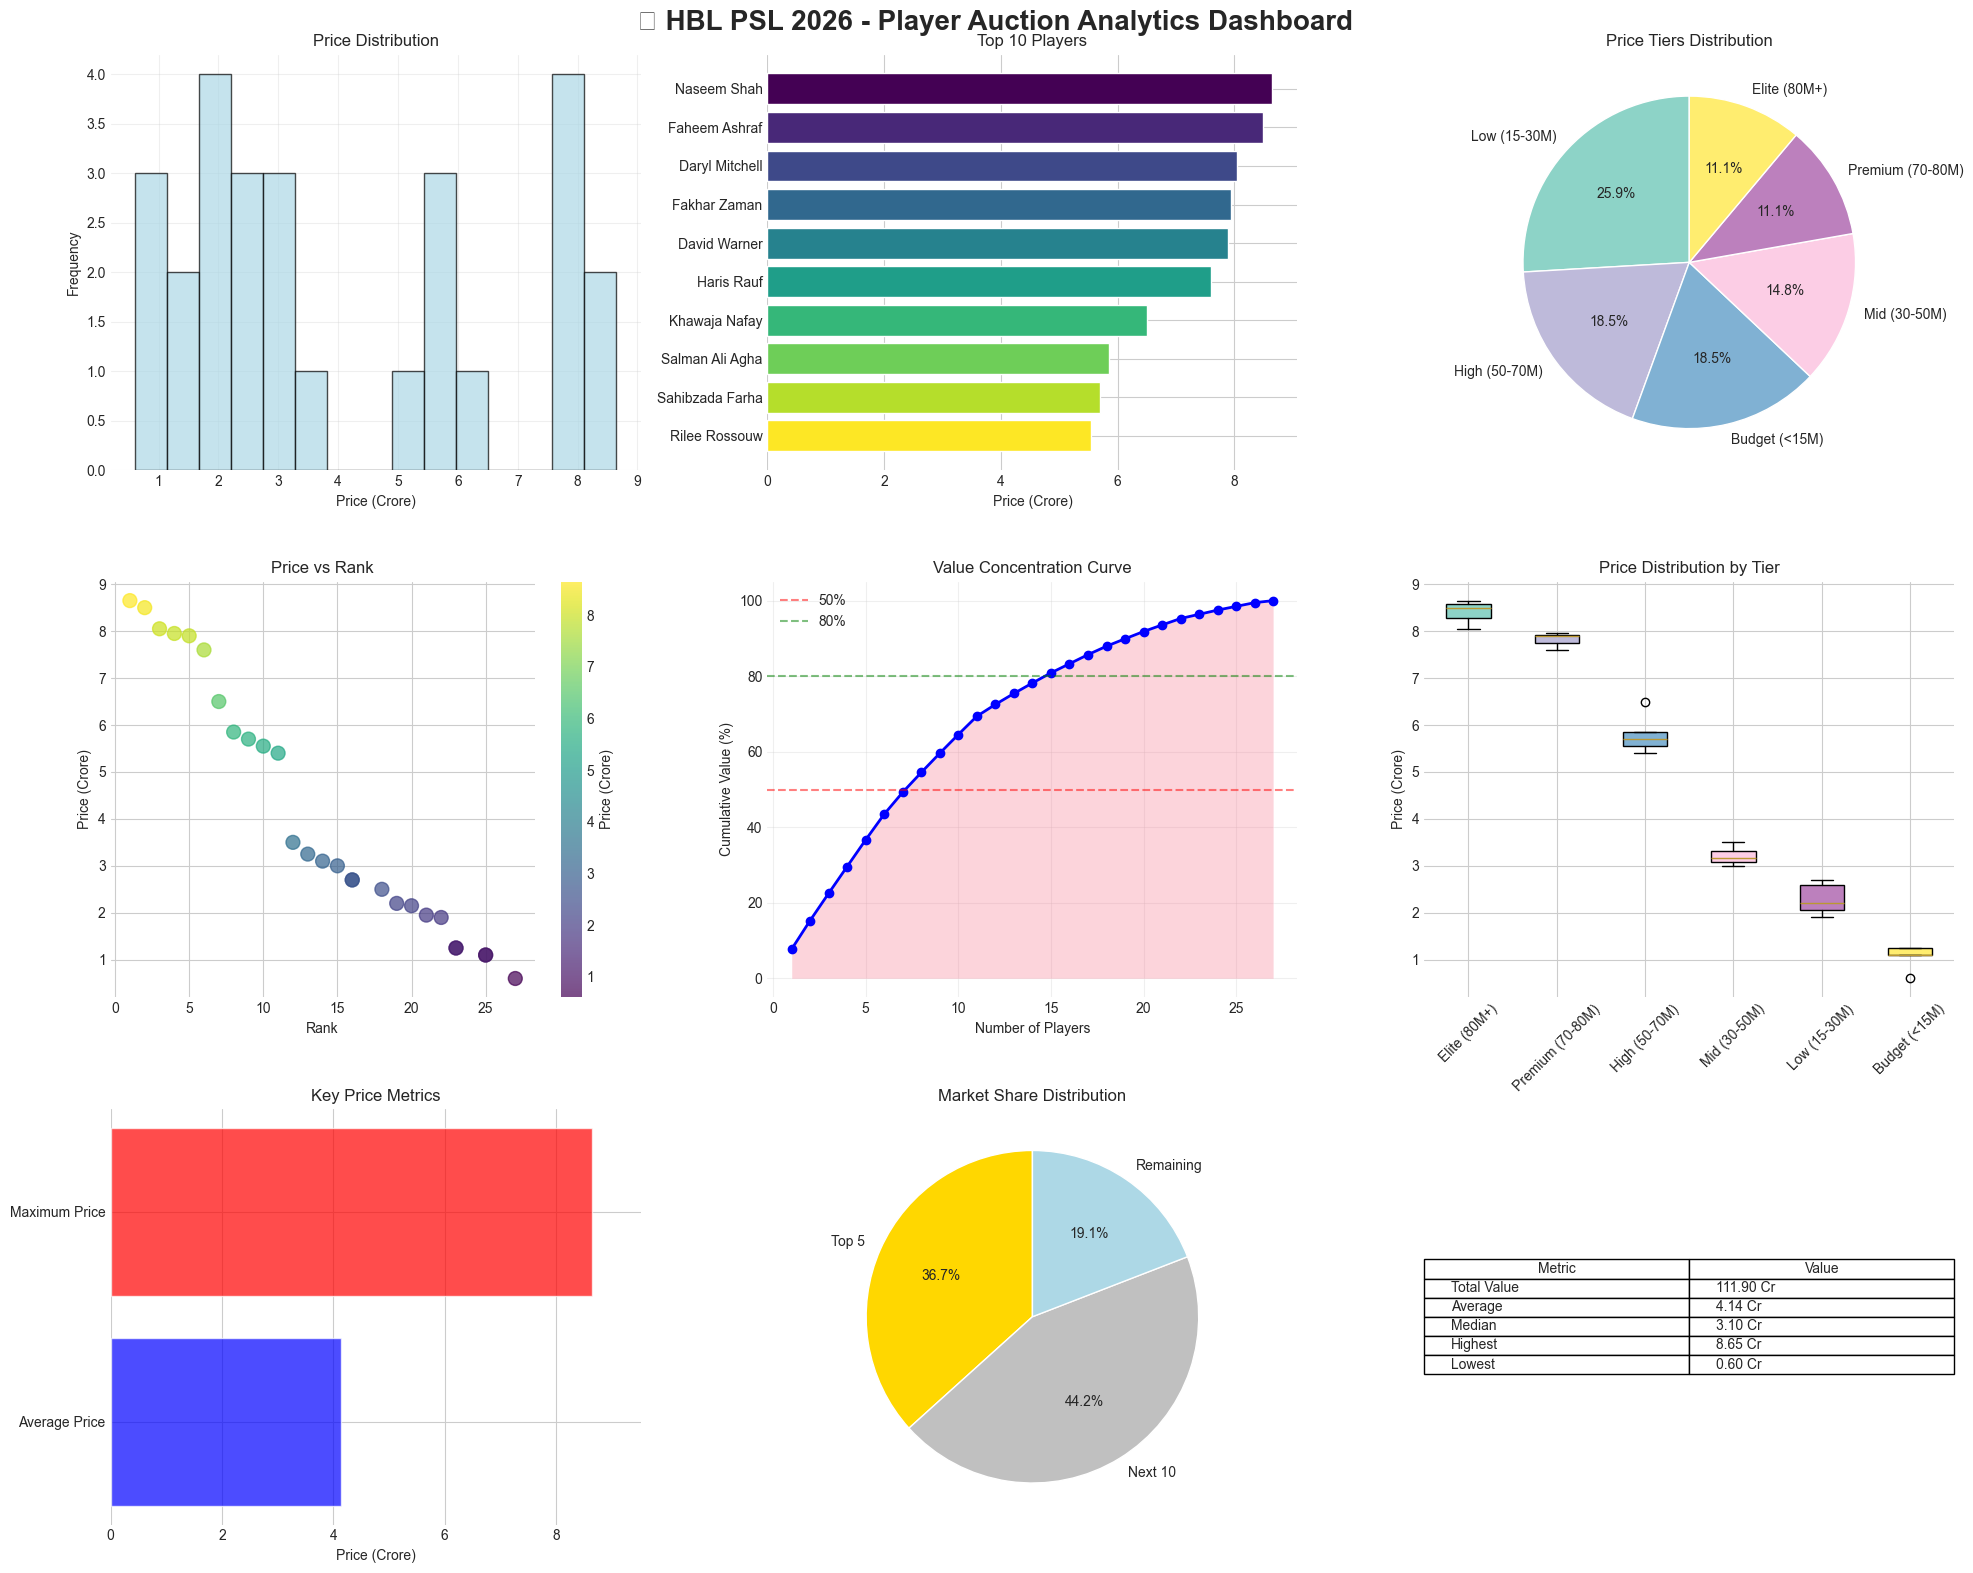

In [10]:
# =============================================================================
# 3️⃣ MATPLOTLIB DASHBOARD (RELIABLE)
# =============================================================================

fig = plt.figure(figsize=(20, 16))
fig.suptitle('🏏 HBL PSL 2026 - Player Auction Analytics Dashboard', fontsize=20, fontweight='bold', y=0.98)

# 1. Price Distribution Histogram
ax1 = plt.subplot(3, 3, 1)
ax1.hist(df['Price_Crores'], bins=15, color='lightblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Price (Crore)')
ax1.set_ylabel('Frequency')
ax1.set_title('Price Distribution')
ax1.grid(True, alpha=0.3)

# 2. Top 10 Players Bar Chart
ax2 = plt.subplot(3, 3, 2)
top10 = df.nlargest(10, 'Price_PKR')
bars = ax2.barh(range(len(top10)), top10['Price_Crores'], color=plt.cm.viridis(np.linspace(0, 1, 10)))
ax2.set_yticks(range(len(top10)))
ax2.set_yticklabels(top10['Player Name (English)'].str[:15])
ax2.set_xlabel('Price (Crore)')
ax2.set_title('Top 10 Players')
ax2.invert_yaxis()

# 3. Price Tiers Pie Chart
ax3 = plt.subplot(3, 3, 3)
tier_counts = df['Price_Tier'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(tier_counts)))
ax3.pie(tier_counts.values, labels=tier_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
ax3.set_title('Price Tiers Distribution')

# 4. Price vs Rank Scatter
ax4 = plt.subplot(3, 3, 4)
scatter = ax4.scatter(df['Price_Rank'], df['Price_Crores'], 
                      c=df['Price_Crores'], cmap='viridis', s=100, alpha=0.7)
ax4.set_xlabel('Rank')
ax4.set_ylabel('Price (Crore)')
ax4.set_title('Price vs Rank')
plt.colorbar(scatter, ax=ax4, label='Price (Crore)')

# 5. Cumulative Value Curve
ax5 = plt.subplot(3, 3, 5)
df_sorted = df.sort_values('Price_PKR', ascending=False)
cumulative_pct = df_sorted['Price_PKR'].cumsum() / df_sorted['Price_PKR'].sum() * 100
ax5.plot(range(1, len(df_sorted)+1), cumulative_pct, 'bo-', linewidth=2, markersize=6)
ax5.fill_between(range(1, len(df_sorted)+1), cumulative_pct, alpha=0.3)
ax5.axhline(y=50, color='r', linestyle='--', alpha=0.5, label='50%')
ax5.axhline(y=80, color='g', linestyle='--', alpha=0.5, label='80%')
ax5.set_xlabel('Number of Players')
ax5.set_ylabel('Cumulative Value (%)')
ax5.set_title('Value Concentration Curve')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Box Plot
ax6 = plt.subplot(3, 3, 6)
box_data = [df[df['Price_Tier'] == tier]['Price_Crores'].values for tier in df['Price_Tier'].unique()]
bp = ax6.boxplot(box_data, patch_artist=True, labels=df['Price_Tier'].unique())
for patch, color in zip(bp['boxes'], plt.cm.Set3(np.linspace(0, 1, len(box_data)))):
    patch.set_facecolor(color)
ax6.set_ylabel('Price (Crore)')
ax6.set_title('Price Distribution by Tier')
ax6.tick_params(axis='x', rotation=45)

# 7. Price Gauge (using bar as alternative)
ax7 = plt.subplot(3, 3, 7)
avg_price = df['Price_Crores'].mean()
max_price = df['Price_Crores'].max()
ax7.barh(['Average Price'], [avg_price], color='blue', alpha=0.7)
ax7.barh(['Maximum Price'], [max_price], color='red', alpha=0.7)
ax7.set_xlabel('Price (Crore)')
ax7.set_title('Key Price Metrics')
ax7.set_xlim(0, max_price * 1.1)

# 8. Market Share Pie
ax8 = plt.subplot(3, 3, 8)
shares = [
    df.nlargest(5, 'Price_PKR')['Price_PKR'].sum() / df['Price_PKR'].sum() * 100,
    df.iloc[5:15]['Price_PKR'].sum() / df['Price_PKR'].sum() * 100,
    df.iloc[15:]['Price_PKR'].sum() / df['Price_PKR'].sum() * 100
]
ax8.pie(shares, labels=['Top 5', 'Next 10', 'Remaining'], 
        autopct='%1.1f%%', colors=['gold', 'silver', 'lightblue'], startangle=90)
ax8.set_title('Market Share Distribution')

# 9. Statistics Table
ax9 = plt.subplot(3, 3, 9)
ax9.axis('tight')
ax9.axis('off')
stats_data = [
    ['Total Value', f"{df['Price_Crores'].sum():.2f} Cr"],
    ['Average', f"{df['Price_Crores'].mean():.2f} Cr"],
    ['Median', f"{df['Price_Crores'].median():.2f} Cr"],
    ['Highest', f"{df['Price_Crores'].max():.2f} Cr"],
    ['Lowest', f"{df['Price_Crores'].min():.2f} Cr"]
]
table = ax9.table(cellText=stats_data, colLabels=['Metric', 'Value'], 
                  loc='center', cellLoc='left')
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

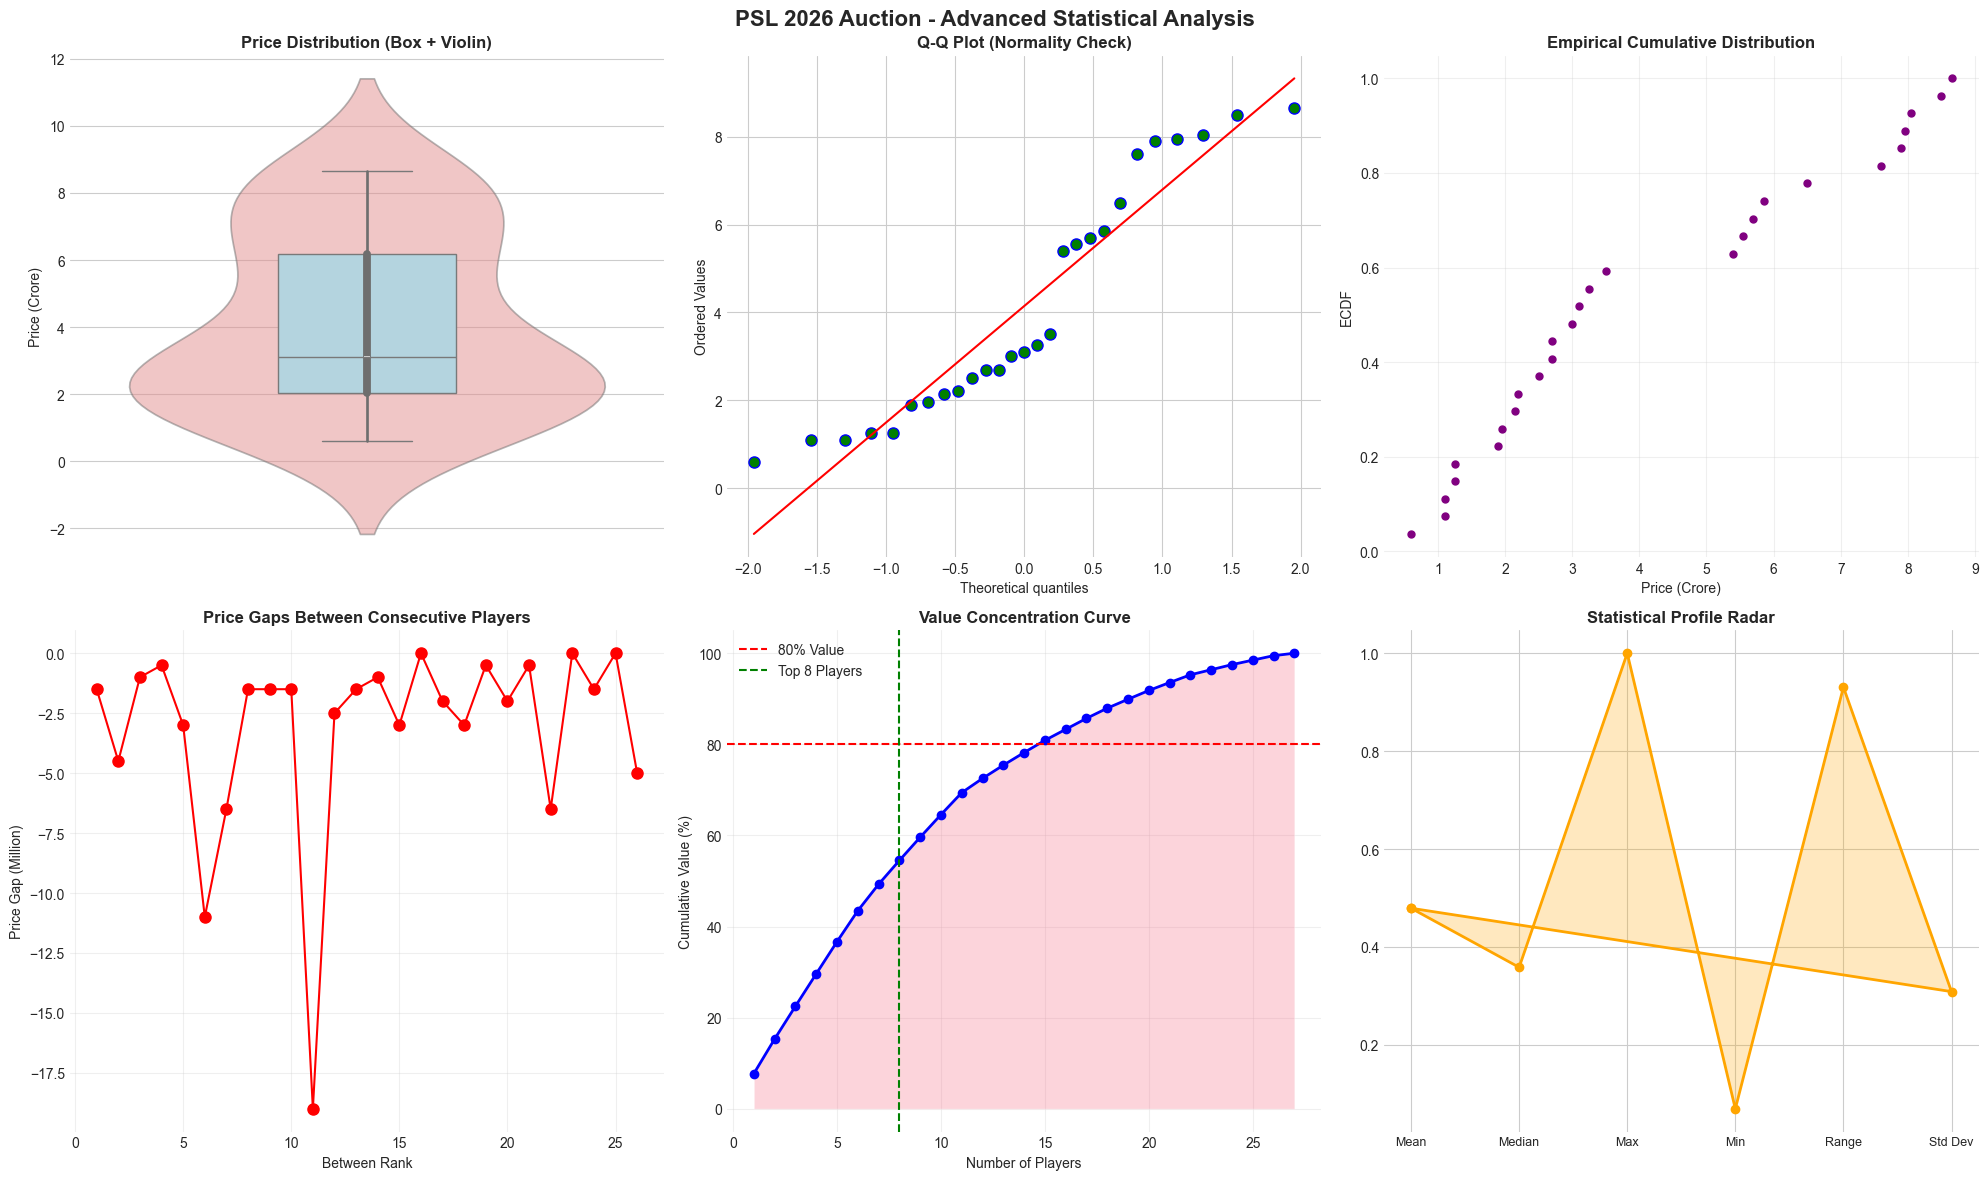

In [11]:


# =============================================================================
# 4️⃣ ADVANCED STATISTICAL VISUALIZATIONS
# =============================================================================

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('PSL 2026 Auction - Advanced Statistical Analysis', fontsize=16, fontweight='bold')

# 1. Box Plot with Violin
ax1 = axes[0, 0]
sns.boxplot(data=df, y='Price_Crores', ax=ax1, color='lightblue', width=0.3)
sns.violinplot(data=df, y='Price_Crores', ax=ax1, color='lightcoral', alpha=0.5)
ax1.set_title('Price Distribution (Box + Violin)', fontweight='bold')
ax1.set_ylabel('Price (Crore)')

# 2. Q-Q Plot for normality
ax2 = axes[0, 1]
stats.probplot(df['Price_Crores'], dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot (Normality Check)', fontweight='bold')
ax2.get_lines()[0].set_markerfacecolor('green')
ax2.get_lines()[0].set_markersize(8)

# 3. ECDF Plot
ax3 = axes[0, 2]
x = np.sort(df['Price_Crores'])
y = np.arange(1, len(x)+1) / len(x)
ax3.plot(x, y, marker='.', linestyle='none', markersize=10, color='purple')
ax3.set_xlabel('Price (Crore)')
ax3.set_ylabel('ECDF')
ax3.set_title('Empirical Cumulative Distribution', fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Price Gap Analysis
ax4 = axes[1, 0]
price_gaps = np.diff(sorted(df['Price_PKR'], reverse=True)) / 1e6
ax4.plot(range(1, len(price_gaps)+1), price_gaps, 'o-', color='red', markersize=8)
ax4.set_xlabel('Between Rank')
ax4.set_ylabel('Price Gap (Million)')
ax4.set_title('Price Gaps Between Consecutive Players', fontweight='bold')
ax4.grid(True, alpha=0.3)

# 5. Concentration Curve
ax5 = axes[1, 1]
df_sorted = df.sort_values('Price_PKR', ascending=False)
cumulative_value = df_sorted['Price_PKR'].cumsum() / df_sorted['Price_PKR'].sum() * 100
ax5.plot(range(1, len(df_sorted)+1), cumulative_value, 'bo-', linewidth=2, markersize=6)
ax5.fill_between(range(1, len(df_sorted)+1), cumulative_value, alpha=0.3)
ax5.axhline(y=80, color='r', linestyle='--', label='80% Value')
ax5.axvline(x=8, color='g', linestyle='--', label='Top 8 Players')
ax5.set_xlabel('Number of Players')
ax5.set_ylabel('Cumulative Value (%)')
ax5.set_title('Value Concentration Curve', fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Radar Chart for Statistics
ax6 = axes[1, 2]
categories = ['Mean', 'Median', 'Max', 'Min', 'Range', 'Std Dev']
values = [
    df['Price_Crores'].mean(),
    df['Price_Crores'].median(),
    df['Price_Crores'].max(),
    df['Price_Crores'].min(),
    df['Price_Crores'].max() - df['Price_Crores'].min(),
    df['Price_Crores'].std()
]
# Normalize values
values = [v / max(values) for v in values]

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

ax6.plot(angles, values, 'o-', linewidth=2, color='orange')
ax6.fill(angles, values, alpha=0.25, color='orange')
ax6.set_xticks(angles[:-1])
ax6.set_xticklabels(categories, fontsize=9)
ax6.set_title('Statistical Profile Radar', fontweight='bold')

plt.tight_layout()
plt.show()

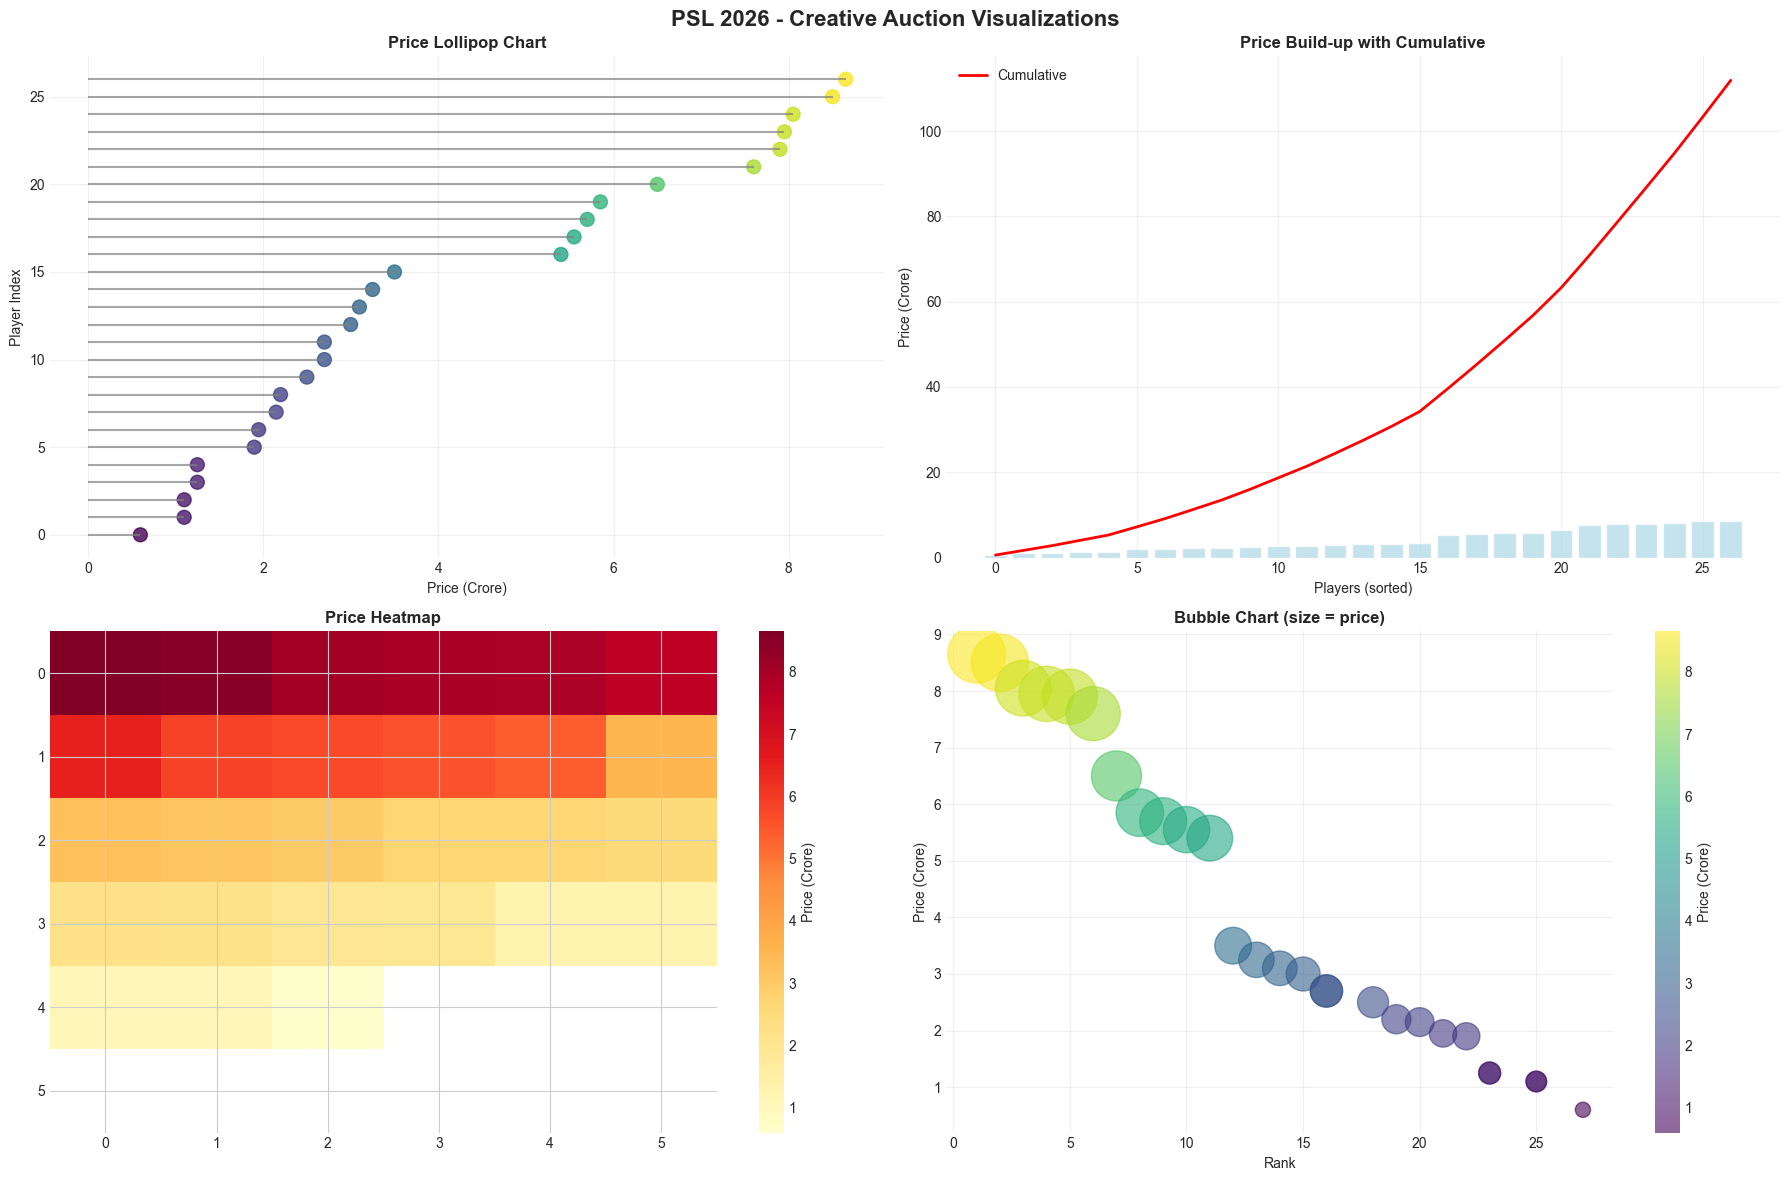

In [12]:

# =============================================================================
# 5️⃣ CREATIVE VISUALIZATIONS
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('PSL 2026 - Creative Auction Visualizations', fontsize=16, fontweight='bold')

# 1. Lollipop Chart
ax1 = axes[0, 0]
df_sorted = df.sort_values('Price_Crores').reset_index(drop=True)
ax1.hlines(y=df_sorted.index, xmin=0, xmax=df_sorted['Price_Crores'], color='gray', alpha=0.7)
ax1.scatter(df_sorted['Price_Crores'], df_sorted.index, s=100, c=df_sorted['Price_Crores'], 
           cmap='viridis', alpha=0.8)
ax1.set_xlabel('Price (Crore)')
ax1.set_ylabel('Player Index')
ax1.set_title('Price Lollipop Chart', fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Waterfall-like Chart
ax2 = axes[0, 1]
cumulative = df_sorted['Price_Crores'].cumsum()
ax2.bar(range(len(df_sorted)), df_sorted['Price_Crores'], color='lightblue', alpha=0.7)
ax2.plot(range(len(df_sorted)), cumulative, 'r-', linewidth=2, label='Cumulative')
ax2.set_xlabel('Players (sorted)')
ax2.set_ylabel('Price (Crore)')
ax2.set_title('Price Build-up with Cumulative', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Heatmap of Price Distribution
ax3 = axes[1, 0]
# Reshape data for heatmap (needs to be square-ish)
n = int(np.ceil(np.sqrt(len(df))))
price_matrix = np.full((n, n), np.nan)
for i, price in enumerate(df['Price_Crores'].values):
    row = i // n
    col = i % n
    price_matrix[row, col] = price

im = ax3.imshow(price_matrix, cmap='YlOrRd', aspect='auto')
ax3.set_title('Price Heatmap', fontweight='bold')
plt.colorbar(im, ax=ax3, label='Price (Crore)')

# 4. Scatter with Size representing another dimension
ax4 = axes[1, 1]
sizes = df['Price_Crores'] * 200  # Scale for visibility
scatter = ax4.scatter(df['Price_Rank'], df['Price_Crores'], s=sizes, 
                      c=df['Price_Crores'], cmap='viridis', alpha=0.6)
ax4.set_xlabel('Rank')
ax4.set_ylabel('Price (Crore)')
ax4.set_title('Bubble Chart (size = price)', fontweight='bold')
plt.colorbar(scatter, ax=ax4, label='Price (Crore)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


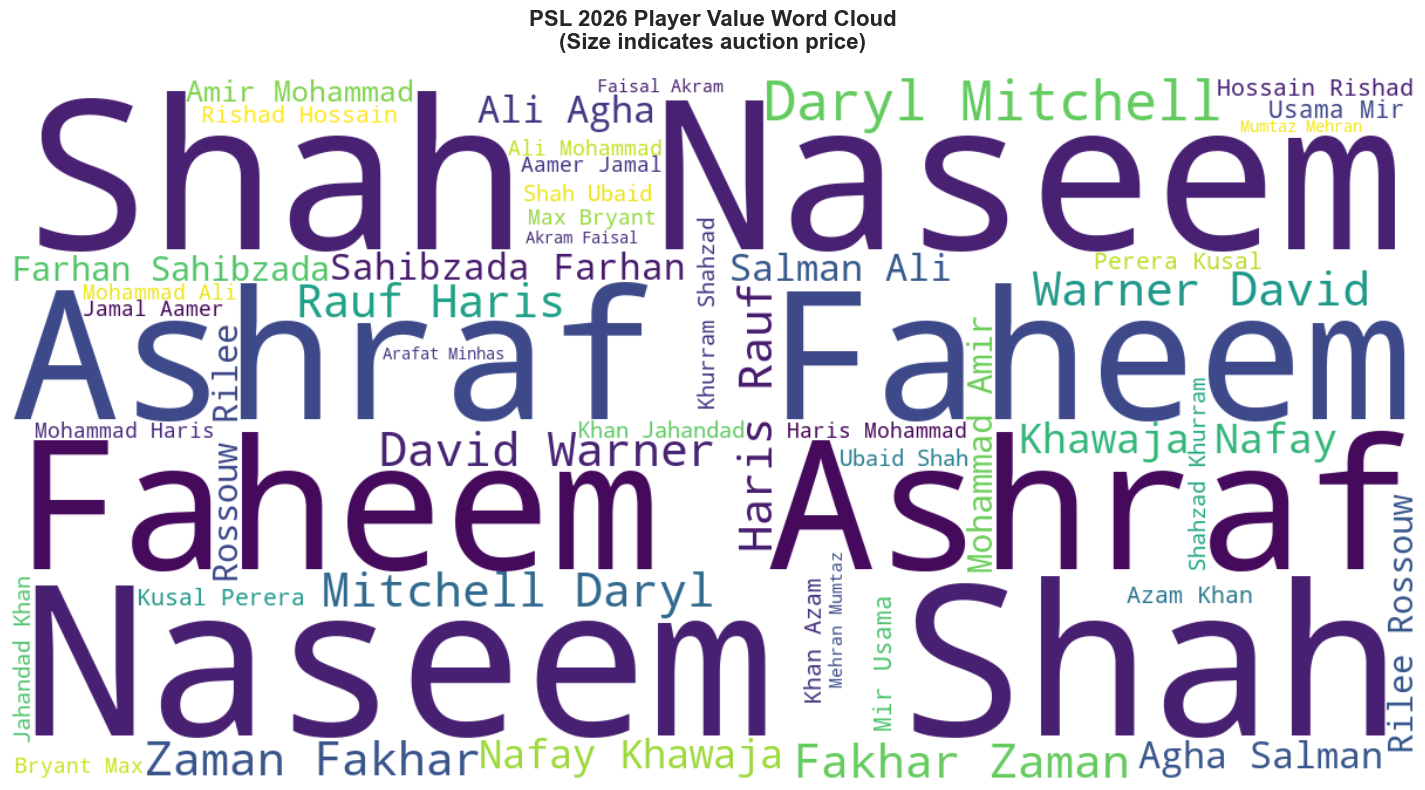

In [16]:
# =============================================================================
# 6️⃣ PLAYER WORD CLOUD & INSIGHTS
# =============================================================================

# Create word cloud of player names (weighted by price)
player_names = ' '.join([f"{name} " * int(price/1e6) 
                         for name, price in zip(df['Player Name (English)'], df['Price_PKR'])])

wordcloud = WordCloud(width=1200, height=600, 
                      background_color='white',
                      colormap='viridis',
                      max_words=50,
                      random_state=42).generate(player_names)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('PSL 2026 Player Value Word Cloud\n(Size indicates auction price)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

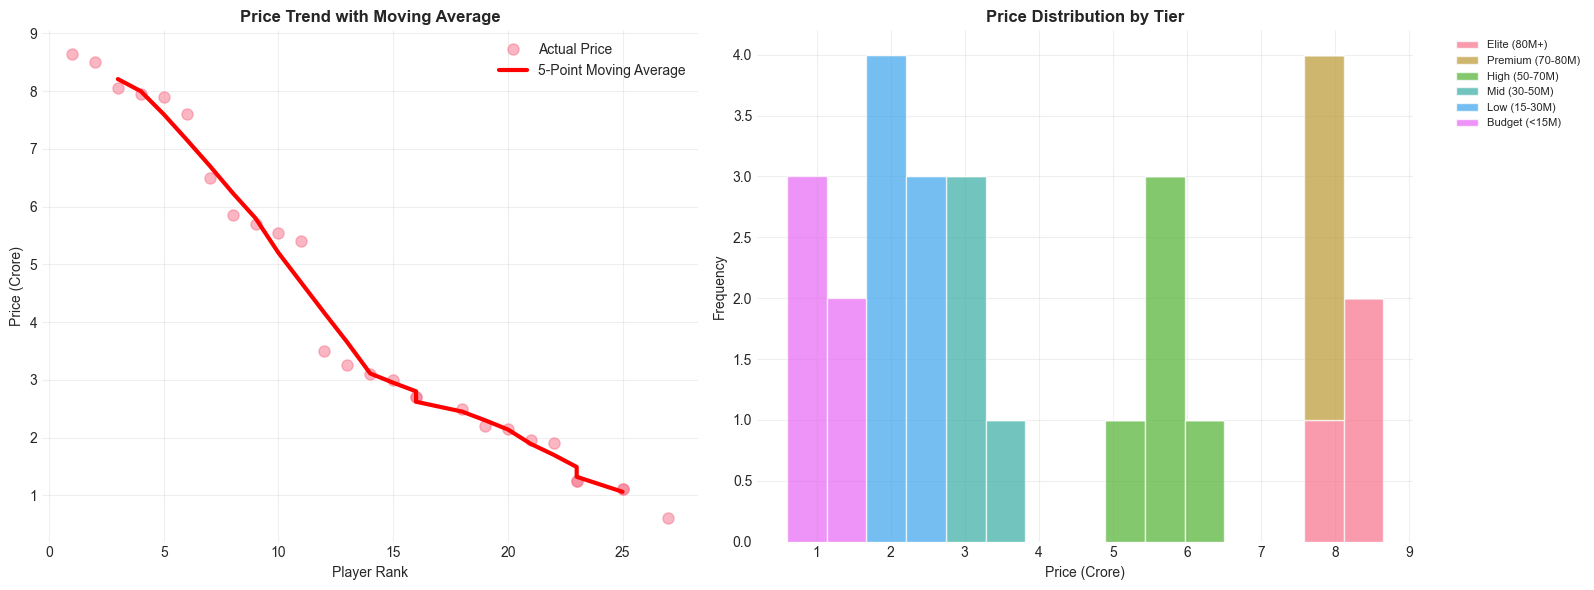

In [17]:

# =============================================================================
# 7️⃣ PRICE TREND & DISTRIBUTION
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Moving Average Trend
ax1 = axes[0]
df_sorted = df.sort_values('Price_Rank')
rolling_mean = df_sorted['Price_Crores'].rolling(window=5, center=True).mean()

ax1.plot(df_sorted['Price_Rank'], df_sorted['Price_Crores'], 'o', 
         markersize=8, alpha=0.5, label='Actual Price')
ax1.plot(df_sorted['Price_Rank'], rolling_mean, 'r-', linewidth=3, 
         label='5-Point Moving Average')
ax1.set_xlabel('Player Rank')
ax1.set_ylabel('Price (Crore)')
ax1.set_title('Price Trend with Moving Average', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Price Density by Tier
ax2 = axes[1]
tier_data = [df[df['Price_Tier'] == tier]['Price_Crores'].values 
             for tier in df['Price_Tier'].unique()]
ax2.hist(tier_data, bins=15, label=df['Price_Tier'].unique(), alpha=0.7, stacked=True)
ax2.set_xlabel('Price (Crore)')
ax2.set_ylabel('Frequency')
ax2.set_title('Price Distribution by Tier', fontweight='bold')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [22]:
pip install trapz

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement trapz (from versions: none)
ERROR: No matching distribution found for trapz


NameError: name 'trapz' is not defined

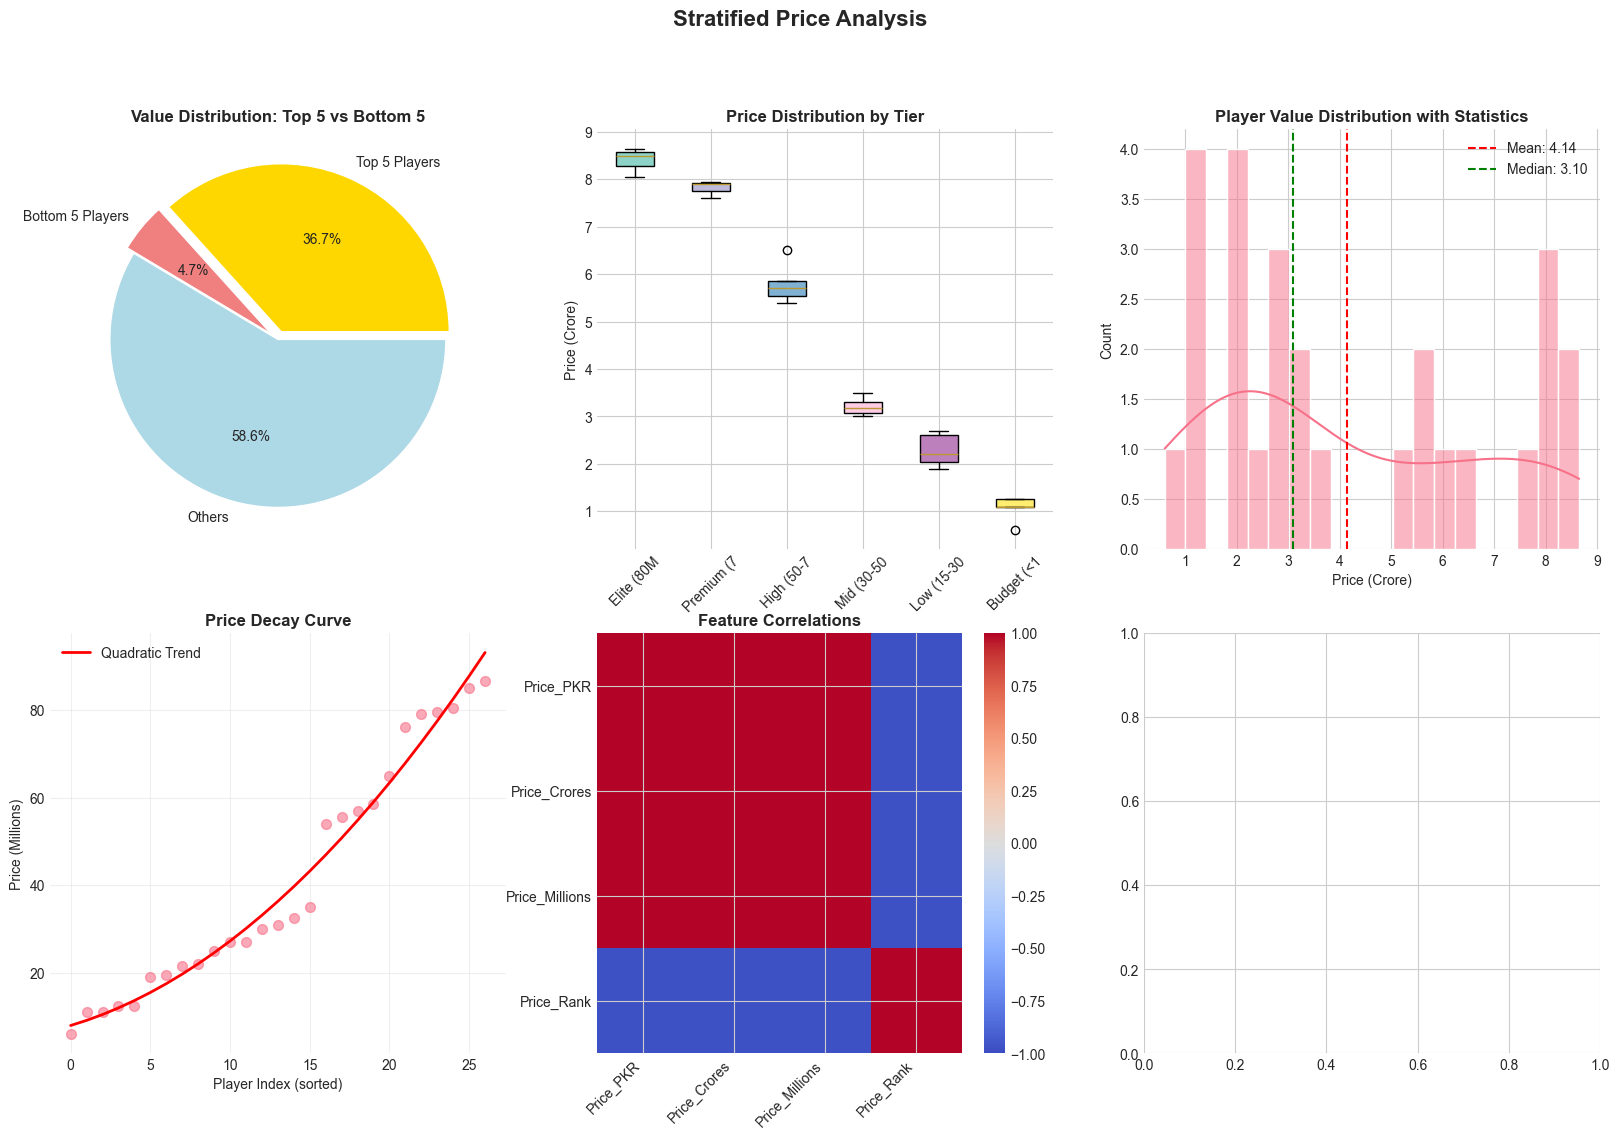

In [24]:
# =============================================================================
# 8️⃣ STRATIFIED ANALYSIS
# =============================================================================

#from scipy.integrate import trapz

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Stratified Price Analysis', fontsize=16, fontweight='bold')

# 1. Top 5 vs Bottom 5 Comparison
ax1 = axes[0, 0]
top5_sum = df.nlargest(5, 'Price_PKR')['Price_PKR'].sum()
bottom5_sum = df.nsmallest(5, 'Price_PKR')['Price_PKR'].sum()
others_sum = df['Price_PKR'].sum() - top5_sum - bottom5_sum
ax1.pie([top5_sum, bottom5_sum, others_sum], 
        labels=['Top 5 Players', 'Bottom 5 Players', 'Others'],
        autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightblue'],
        explode=(0.05, 0.05, 0))
ax1.set_title('Value Distribution: Top 5 vs Bottom 5', fontweight='bold')

# 2. Box Plot by Tier (simplified)
ax2 = axes[0, 1]
tiers = df['Price_Tier'].unique()
data_to_plot = [df[df['Price_Tier'] == tier]['Price_Crores'].values for tier in tiers]
bp = ax2.boxplot(data_to_plot, patch_artist=True, labels=[t[:10] for t in tiers])
for patch, color in zip(bp['boxes'], plt.cm.Set3(np.linspace(0, 1, len(data_to_plot)))):
    patch.set_facecolor(color)
ax2.set_ylabel('Price (Crore)')
ax2.set_title('Price Distribution by Tier', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

# 3. Player Value Histogram with KDE
ax3 = axes[0, 2]
sns.histplot(data=df, x='Price_Crores', kde=True, bins=20, ax=ax3)
ax3.axvline(df['Price_Crores'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df["Price_Crores"].mean():.2f}')
ax3.axvline(df['Price_Crores'].median(), color='green', linestyle='--',
            label=f'Median: {df["Price_Crores"].median():.2f}')
ax3.set_title('Player Value Distribution with Statistics', fontweight='bold')
ax3.set_xlabel('Price (Crore)')
ax3.set_ylabel('Count')
ax3.legend()

# 4. Scatter with Regression
ax4 = axes[1, 0]
x = np.arange(len(df))
y = df.sort_values('Price_PKR')['Price_PKR'].values
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
ax4.scatter(x, y/1e6, alpha=0.6, s=50)
ax4.plot(x, p(x)/1e6, 'r-', linewidth=2, label='Quadratic Trend')
ax4.set_xlabel('Player Index (sorted)')
ax4.set_ylabel('Price (Millions)')
ax4.set_title('Price Decay Curve', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Correlation Heatmap (simplified)
ax5 = axes[1, 1]
# Create correlation matrix of numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
im = ax5.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
ax5.set_xticks(range(len(numeric_cols)))
ax5.set_yticks(range(len(numeric_cols)))
ax5.set_xticklabels(numeric_cols, rotation=45, ha='right')
ax5.set_yticklabels(numeric_cols)
ax5.set_title('Feature Correlations', fontweight='bold')
plt.colorbar(im, ax=ax5)

# 6. Price Gini Coefficient Visualization
ax6 = axes[1, 2]
df_sorted = df.sort_values('Price_PKR')
cum_share = np.cumsum(df_sorted['Price_PKR']) / df_sorted['Price_PKR'].sum()
cum_pop = np.linspace(0, 1, len(df_sorted))
gini = (trapz(cum_pop, cum_pop) - trapz(cum_share, cum_pop)) / trapz(cum_pop, cum_pop)
ax6.plot(cum_pop, cum_share, 'b-', linewidth=2, label='Lorenz Curve')
ax6.plot([0, 1], [0, 1], 'k--', label='Perfect Equality')
ax6.fill_between(cum_pop, cum_pop, cum_share, alpha=0.3, color='red')
ax6.set_xlabel('Cumulative Population Share')
ax6.set_ylabel('Cumulative Value Share')
ax6.set_title(f'Lorenz Curve (Gini: {gini:.3f})', fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:

# =============================================================================
# 9️⃣ COMPREHENSIVE STATISTICAL SUMMARY
# =============================================================================

print("\n" + "="*100)
print("🏏 HBL PSL 2026 - COMPREHENSIVE AUCTION ANALYSIS REPORT")
print("="*100)

# Price Statistics
print("\n📊 PRICE STATISTICS (in PKR)")
print("-"*50)
stats_dict = {
    'Total Auction Value': f"{df['Price_PKR'].sum():,.0f}",
    'Average Price': f"{df['Price_PKR'].mean():,.0f}",
    'Median Price': f"{df['Price_PKR'].median():,.0f}",
    'Mode Price': f"{df['Price_PKR'].mode()[0]:,.0f}",
    'Standard Deviation': f"{df['Price_PKR'].std():,.0f}",
    'Variance': f"{df['Price_PKR'].var():,.0f}",
    'Minimum Price': f"{df['Price_PKR'].min():,.0f}",
    'Maximum Price': f"{df['Price_PKR'].max():,.0f}",
    'Range': f"{df['Price_PKR'].max() - df['Price_PKR'].min():,.0f}",
    'Coefficient of Variation': f"{(df['Price_PKR'].std() / df['Price_PKR'].mean() * 100):.2f}%",
    'Skewness': f"{df['Price_PKR'].skew():.3f}",
    'Kurtosis': f"{df['Price_PKR'].kurtosis():.3f}"
}

for key, value in stats_dict.items():
    print(f"{key:<25}: {value:>15}")

# Percentiles
print("\n📈 PRICE PERCENTILES (in Crores)")
print("-"*50)
percentiles = [5, 10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = np.percentile(df['Price_Crores'], p)
    print(f"{p}th Percentile{' ' if p<10 else ''}: {value:.2f} Crore")

# Tier Analysis
print("\n🏷️ PRICE TIER DISTRIBUTION")
print("-"*50)
tier_analysis = df.groupby('Price_Tier').agg({
    'Player Name (English)': 'count',
    'Price_Crores': ['sum', 'mean', 'min', 'max']
}).round(2)
tier_analysis.columns = ['Count', 'Total (Cr)', 'Avg (Cr)', 'Min (Cr)', 'Max (Cr)']
print(tier_analysis)

# Top Performers
print("\n🌟 TOP 10 MOST VALUABLE PLAYERS")
print("-"*70)
top10_display = df.nlargest(10, 'Price_PKR')[['Price_Rank', 'Player Name (English)', 
                                               'Price_Crores', 'Price_Tier']]
top10_display.columns = ['Rank', 'Player', 'Price (Cr)', 'Tier']
print(top10_display.to_string(index=False))

# Market Concentration
print("\n🎯 MARKET CONCENTRATION METRICS")
print("-"*50)
top3_pct = df.nlargest(3, 'Price_PKR')['Price_PKR'].sum() / df['Price_PKR'].sum() * 100
top5_pct = df.nlargest(5, 'Price_PKR')['Price_PKR'].sum() / df['Price_PKR'].sum() * 100
top10_pct = df.nlargest(10, 'Price_PKR')['Price_PKR'].sum() / df['Price_PKR'].sum() * 100

print(f"Top 3 Players Value Share : {top3_pct:.1f}%")
print(f"Top 5 Players Value Share : {top5_pct:.1f}%")
print(f"Top 10 Players Value Share: {top10_pct:.1f}%")
print(f"Remaining 17 Players Share: {100-top10_pct:.1f}%")

# Outlier Detection
print("\n🔍 OUTLIER DETECTION")
print("-"*50)
Q1 = df['Price_Crores'].quantile(0.25)
Q3 = df['Price_Crores'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price_Crores'] < lower_bound) | (df['Price_Crores'] > upper_bound)]
print(f"Lower Bound: {lower_bound:.2f} Crore")
print(f"Upper Bound: {upper_bound:.2f} Crore")
print(f"Outliers Detected: {len(outliers)} players")
if len(outliers) > 0:
    print("\nOutlier Players:")
    for _, row in outliers.iterrows():
        print(f"  • {row['Player Name (English)']}: {row['Price_Crores']:.2f} Crore")


🏏 HBL PSL 2026 - COMPREHENSIVE AUCTION ANALYSIS REPORT

📊 PRICE STATISTICS (in PKR)
--------------------------------------------------
Total Auction Value      :   1,119,000,000
Average Price            :      41,444,444
Median Price             :      31,000,000
Mode Price               :      11,000,000
Standard Deviation       :      26,706,501
Variance                 : 713,237,179,487,179
Minimum Price            :       6,000,000
Maximum Price            :      86,500,000
Range                    :      80,500,000
Coefficient of Variation :          64.44%
Skewness                 :           0.455
Kurtosis                 :          -1.307

📈 PRICE PERCENTILES (in Crores)
--------------------------------------------------
5th Percentile : 1.10 Crore
10th Percentile: 1.19 Crore
25th Percentile: 2.05 Crore
50th Percentile: 3.10 Crore
75th Percentile: 6.17 Crore
90th Percentile: 7.99 Crore
95th Percentile: 8.37 Crore
99th Percentile: 8.61 Crore

🏷️ PRICE TIER DISTRIBUTION
--------

In [26]:
# =============================================================================
# 1️⃣1️⃣ EXPORT ENHANCED DATASET
# =============================================================================

# Create comprehensive export dataset
df_export = df.copy()
df_export['Price_USD_Estimate'] = df_export['Price_PKR'] / 280  # Approximate USD conversion
df_export['Value_Percentile'] = df_export['Price_PKR'].rank(pct=True)
df_export['Is_Outlier'] = ((df_export['Price_Crores'] < lower_bound) | 
                            (df_export['Price_Crores'] > upper_bound))
df_export['Z_Score'] = (df_export['Price_PKR'] - df_export['Price_PKR'].mean()) / df_export['Price_PKR'].std()

# Select and order columns
export_cols = ['Price_Rank', 'Player Name (English)', 'Player Name (Urdu)',
               'Price_PKR', 'Price_Crores', 'Price_USD_Estimate',
               'Price_Tier', 'Value_Percentile', 'Z_Score', 'Is_Outlier']
df_export_final = df_export[export_cols].sort_values('Price_Rank')
df_export_final.columns = ['Rank', 'Player (English)', 'Player (Urdu)',
                          'Price (PKR)', 'Price (Crore)', 'Price (USD Est)',
                          'Tier', 'Value Percentile', 'Z-Score', 'Is Outlier']

# Save to CSV
df_export_final.to_csv('psl_2026_complete_analysis.csv', index=False)
print("\n" + "="*100)
print("✅ Enhanced analysis exported to 'psl_2026_complete_analysis.csv'")
print("="*100)

# Display first few rows of exported data
print("\n📋 Preview of Exported Data (First 5 rows):")
print(df_export_final.head().to_string())

print("\n" + "="*100)
print("🎉 ANALYSIS COMPLETE! THANK YOU FOR USING PSL 2026 PRO ANALYTICS")
print("="*100)


✅ Enhanced analysis exported to 'psl_2026_complete_analysis.csv'

📋 Preview of Exported Data (First 5 rows):
   Rank Player (English) Player (Urdu)  Price (PKR)  Price (Crore)  Price (USD Est)              Tier  Value Percentile  Z-Score  Is Outlier
0     1      Naseem Shah      نسیم شاہ  86500000.00           8.65        308928.57      Elite (80M+)              1.00     1.69       False
1     2    Faheem Ashraf     فہیم اشرف  85000000.00           8.50        303571.43      Elite (80M+)              0.96     1.63       False
2     3   Daryl Mitchell      ڈیرل مچل  80500000.00           8.05        287500.00      Elite (80M+)              0.93     1.46       False
3     4     Fakhar Zaman      فخر زمان  79500000.00           7.95        283928.57  Premium (70-80M)              0.89     1.42       False
4     5     David Warner    ڈیوڈ وارنر  79000000.00           7.90        282142.86  Premium (70-80M)              0.85     1.41       False

🎉 ANALYSIS COMPLETE! THANK YOU FOR USING PS